> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This reprt demnistrate information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show upfor their appointment and what are the factors affecting that.


### Question(s) for Analysis
#### what is the percintage of patients attended the appointment?
#### what are the factors affecting patient attendance ?

In [11]:
#importing libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [12]:
#loading data and reading few lines to explore it
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#see the number of patients 
df.shape

(110527, 14)

In [14]:
#see some statistics about data to see if there is anything unusual
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


there is somethin wrong in the data as the minimum age is -1 

In [15]:
# fixing the minimum age, it should be at least 0
df = df[df['Age']>= 0]

In [16]:
#to make shure it fixed correctly
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
#see if there is any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


there is no missing data


### Data Cleaning

 

In [18]:
#dropping some unneccisary data to our analysis
df.drop(['PatientId','AppointmentID'],axis=1 ,inplace=True)


<a id='eda'></a>
## Exploratory Data Analysis


overview of the whole data

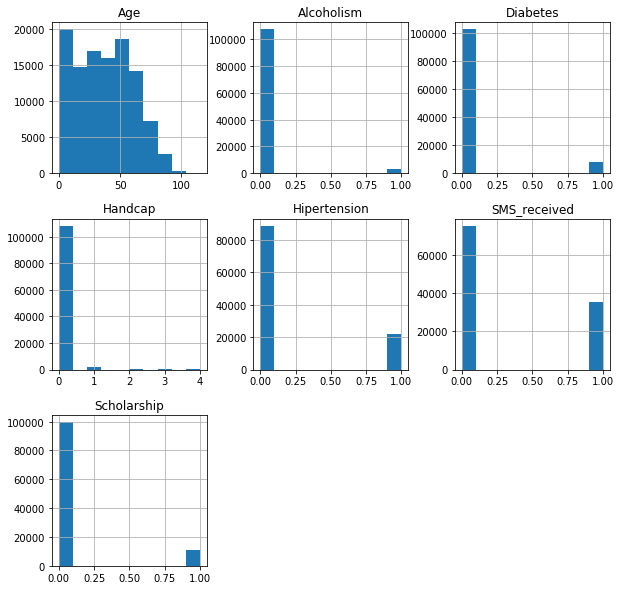

In [19]:
#see histogrames for all the data 
df.hist(figsize=(10,10));

most people don't have diabetes

most patients didn't suffer from alcholism

most patents are not handcapped

number of patients how didn't recieve sms is douple the number of patients how didn't


### Hwo many patients attended the appointment ?

In [9]:
#number of patients who showed in the appointmnet
df[df['No-show']=='No'].count()

Gender            88208
ScheduledDay      88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hipertension      88208
Diabetes          88208
Alcoholism        88208
Handcap           88208
SMS_received      88208
No-show           88208
dtype: int64

In [10]:
#number of patients who didn't show in the appointmnet
df[df['No-show']=='Yes'].count()

Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hipertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No-show           22319
dtype: int64

number of patients attended the appoimtment : 88208

number of patients did ont attend the appoimtment : 22319

#### about 80% of the patients attended the appointment 

# What are the factors affecting patient attendance to the appointments ?


In [12]:
#creating function that showes histogram of any colomn
def data_plots(col):
    df.groupby(['No-show'])[col].hist(figsize=(10,10))
    plt.title(' comparison between who showed and who did not shwo')
    plt.xlabel(col)
    plt.ylabel('number of patients')


### Is patients attending the appointment affected by gender ?

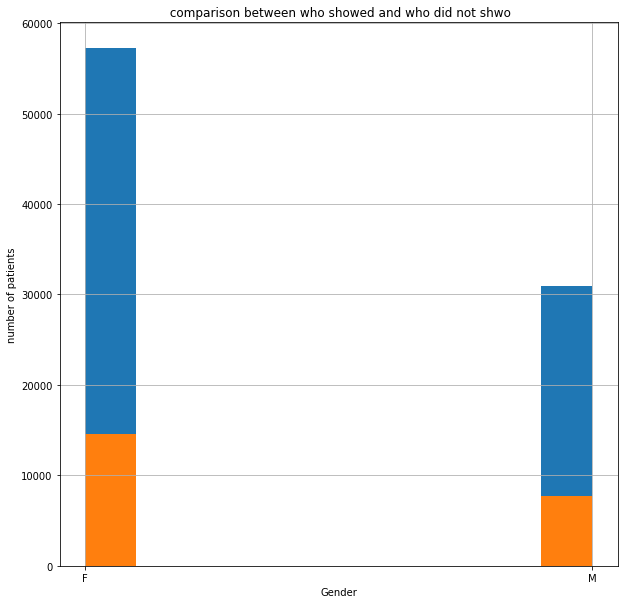

In [13]:
#histogram demonistrates hwo many patients went to the appointment in every gender

data_plots('Gender')

Gender does not affect whether the patient attended the appointment or not 

### Is patients attending the appointment affected by age ?

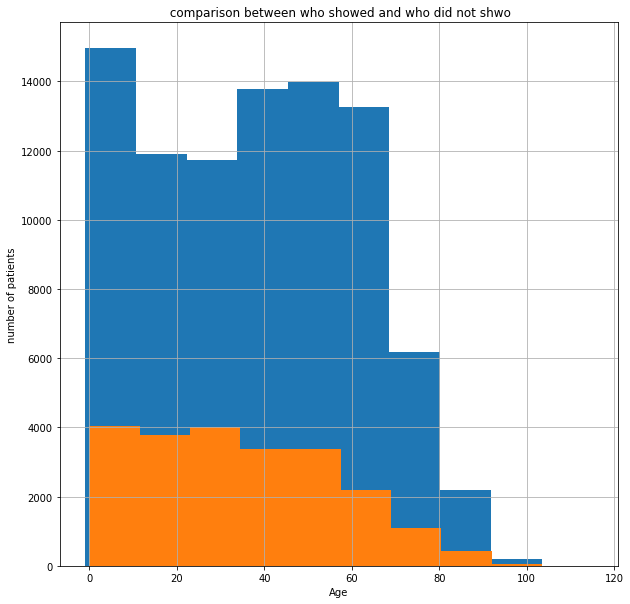

In [14]:
#histogram demonistrates hwo many patients went to the appointment in every age
data_plots('Age')

patients in the age groupe from 0 to 10 yeares old are the most to attend

patients between 35 and 55 years are the second most group to attend



### Is patients attending the appointment affected by SMS ?

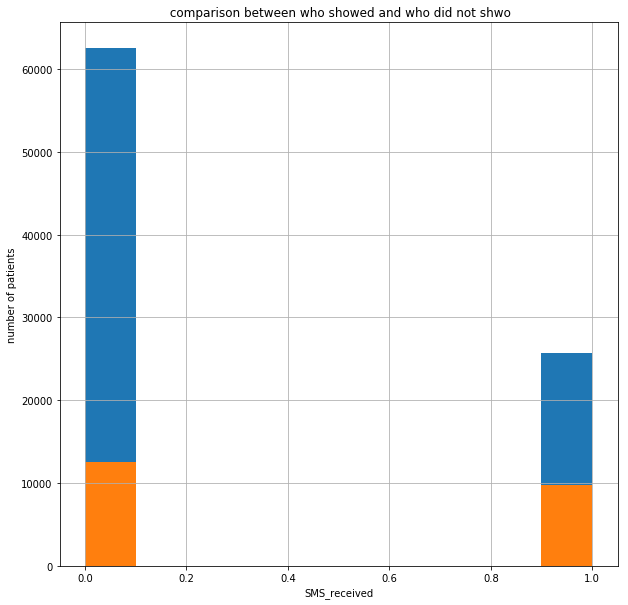

In [15]:
#histogram demonistrates hwo many patients went to the appointment and recieved SMS
data_plots('SMS_received')

patients who received SMS attended less than who did not receive one  

### Is patients attending the appointment affected by handcap ?

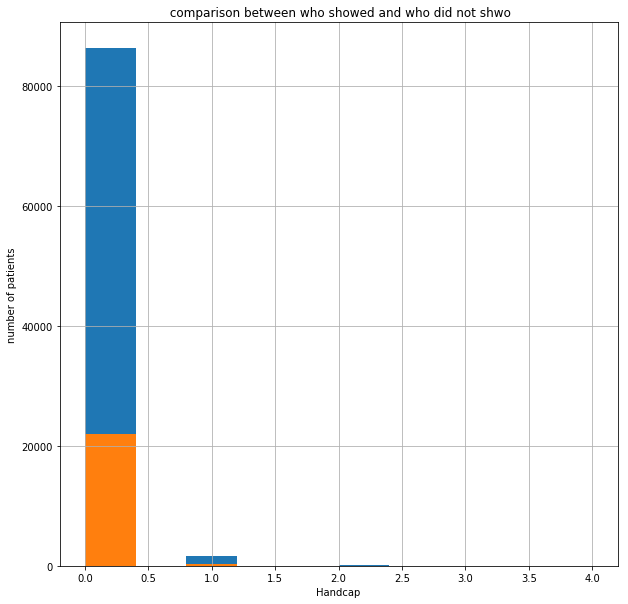

In [16]:
#histogram demonistrates hwo many patients went to the appointment in handcapped and not handcapped patients

data_plots('Handcap')

handcap is insegnificant in the comparison

### Is patients attending the appointment affected by Scholarship ?

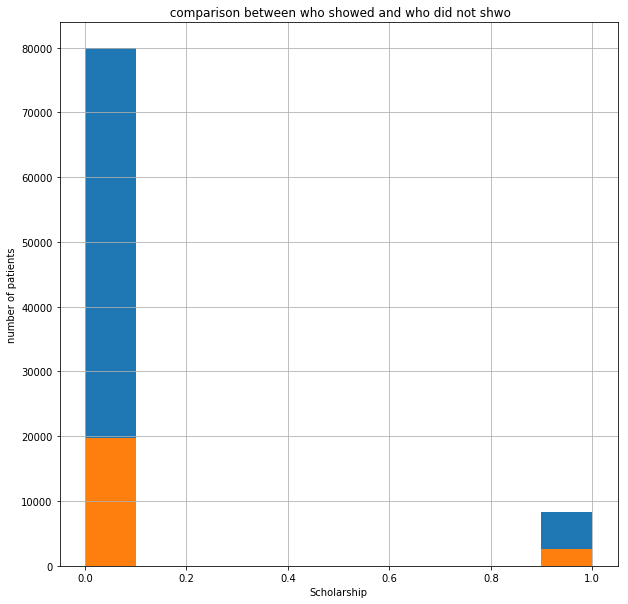

In [17]:
#histogram demonistrates hwo many patients went to the appointment in patients who have scholarship and how don't

data_plots('Scholarship')

scholarship is not segnificant 

### is the gender affecting patients who receiver SMS attetude ?

In [36]:
#creating dataframes for patients who attended the appointment and who did not 
show = df[df['No-show']=='No']
noshow = df[df['No-show']=='Yes']

### males and females who received SMS and did show

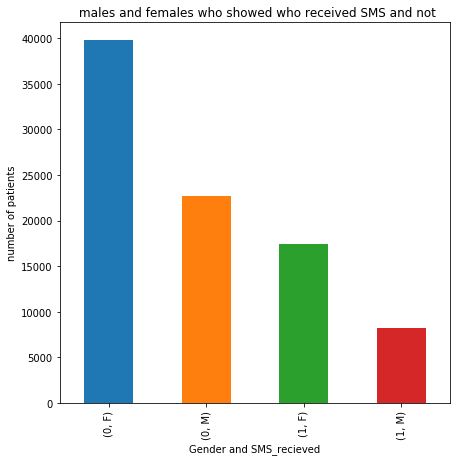

In [41]:
#making histogram for the patients who attended tha appointnemt
show.groupby(['SMS_received'])['Gender'].value_counts().plot(kind='bar', figsize=(7,7))

plt.title(' males and females who showed who received SMS and not')
plt.xlabel('Gender and SMS_recieved')
plt.ylabel('number of patients');

### males and females who received SMS and didn't show

Text(0,0.5,'number of patients')

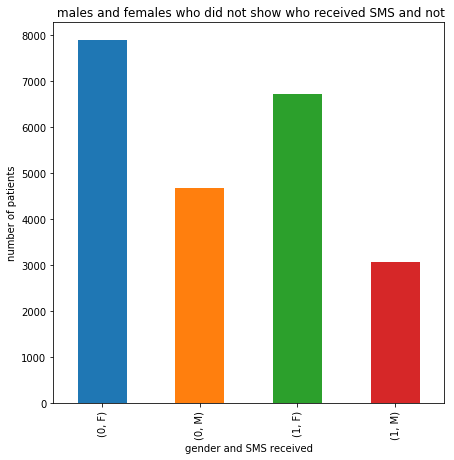

In [42]:
#making histogram for the patients who did not attend tha appointnemt

noshow.groupby(['SMS_received'])['Gender'].value_counts().plot(kind='bar', figsize=(7,7))
plt.title(' males and females who did not show who received SMS and not')
plt.xlabel('gender and SMS received')
plt.ylabel('number of patients');

interistingly, it seems like females didn't respond to the SMS more than males

### Is patients attending the appointment affected by Neighbourhood ?

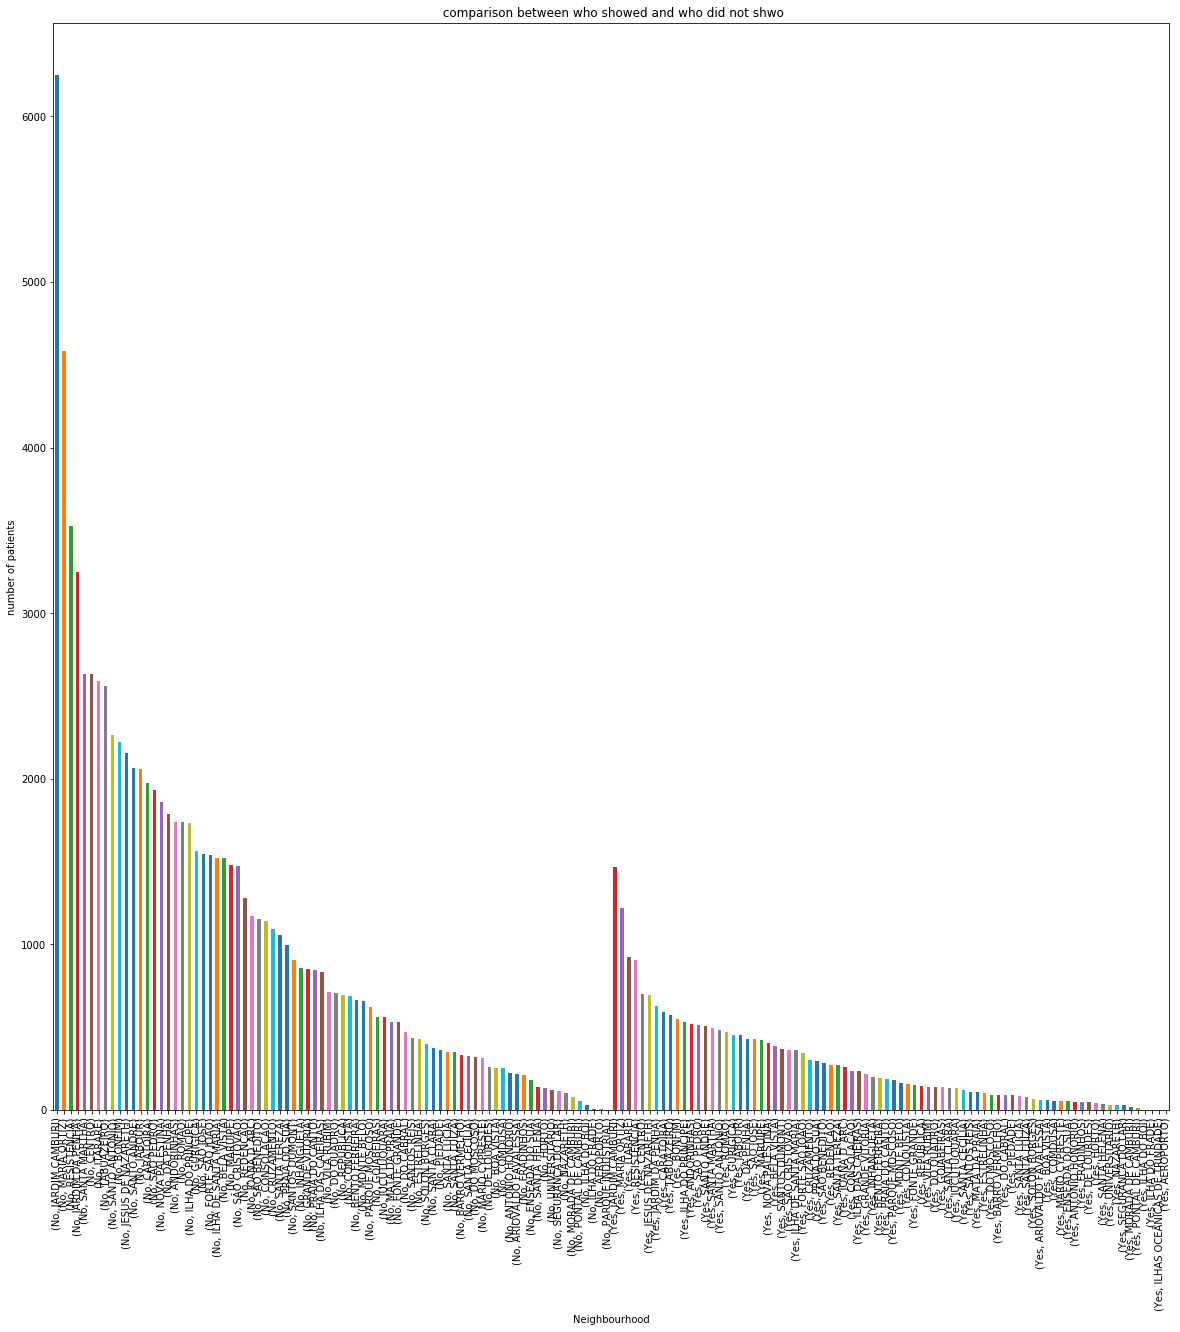

In [20]:
df.groupby(['No-show'])['Neighbourhood'].value_counts().plot.bar(figsize=(20,20))
plt.title(' comparison between who showed and who did not shwo')
plt.xlabel('Neighbourhood')
plt.ylabel('number of patients');

Neighbourhood is a significat factor in patient attendance to the appointment

<a id='conclusions'></a>
## Conclusions

To conclude, age, SMS and neighbourhood are the most factors affected the attendance of the patients.

Neighbourhood seems to be the most factor affecting if the patient will show in the appointment.

Patients in age groups between 35 and 55 and smaller than 10 years are the most to attend the appointment.

A bet strange that patients received SMS showed less than who didn't.

Females did not respond to the SMS more than males .

didn't find direct strong relation betwen patients attendance to the appointments and gender,scholarship and handcap.


### Limitations
 Lots of the columns used categorical data which makes it more difficult to analyze and visualize.
 
 The uneven sample between males and females makes it defficult to drow conclusions in this area.
 



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])